<a href="https://colab.research.google.com/github/barisetiawan51/Skilvul_Project/blob/main/BuildMachineLearning_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Nama          : Imam Bari Setiawan
Asal Kampus   : Universitas Muhammadiyah Purwokerto
Program Studi : Teknik Informatika
Grup          : 5
```

# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition

## Latar Belakang
Saat ini sistem rekomendasi menjadi bidang penelitian yang menarik adanya kemajuan teknologi. Sistem rekomendasi sudah dimanfaatkan dalam bidang kesehatan guna membuat sebuah perubahan yang diterapkan pada situs website. Pengguna mengunjungi situs website kesehatan untuk mencari atau menentukan jenis obat yang cocok bagi pengguna, sistem rekomendasi secara otomatis menampilkan jenis obat yang berkaitan dengan pengguna.

Kesulitan dalam memilih obat yang tepat merupakan salah satu permasalahan yang sering dihadapi. Banyak pengguna yang masih menghadapi kesulitan dalam mengelola persediaan obat yang sesuai dengan penyakitnya. Hal ini berkaitan dengan kurangnya pengetahuan yang mendalam mengenai obat-obatan dan cara penggunaannya yang sesuai dengan aturan pakai. Selain itu, pengguna tidak menyadari potensi efek samping dari obat-obatan yang dikonsumsinya.

Dengan permasalahan yang dihadapi maka diperlukannya sistem rekomendasi yang memberikan kesesuaian obat dengan kondisi medis pengguna, riwayat kesehatan dan obat pilihan pengguna. Selain memberikan rekomendasi obat, dibutuhkan juga keakuratan informasi obat dan memberikan pengguna sumber informasi yang terpercaya seperti lembaga yang memproduksi obat.

## Tujuan Penelitian
1. Mengembangkan sistem rekomendasi obat yang sesuai dengan kondisi medis pengguna dan riwayat kesehatan pengguna.
2. Menyediakan informasi mengenai obat agar mudah dimengerti oleh pengguna, seperti komposisi, kegunaan dan efek samping.
3. Meningkatkan keakuratan informasi obat dari sumber yang terpercaya, seperti lembaga kesehatan resmi.
4. Menyediakan akses yang mudah untuk mendapatkan informasi obat melalui situs website.

## Rumusan Masalah
1. Bagaimana cara mengembangkan sistem rekomendasi obat yang sesuai dengan kondisi medis pengguna dan riwayat kesehatan pengguna?
2. Upaya apa yang dapat dilakukan untuk menyediakan informasi obat agar mudah dimengerti oleh pengguna?
3. Hal apa yang dapat dilakukan untuk meningkatkan keakuratan informasi obat dari sumber yang terpercaya?
4. Bagaimana cara memberikan akses yang mudah untuk mendapatkan informasi obat melalui situs website?

## Data yang akan dipakai
1. Nama dataset adalah Medicine Recommendation System.
2. Sumber data diperoleh dari Kaggle dengan alamat URL sebagai berikut: [Dataset Kaggle Medicine Recommendation System](https://www.kaggle.com/code/nihilus888/medicine-recommendation-system/notebook)
3. Deskripsi atau detail dapat dijabarkan dibawah ini:
    * Nama Obat: Kumpulan data mencakup nama lebih dari 11.000 obat, menjadikannya koleksi produk farmasi yang komprehensif.

    * Komposisi: Untuk setiap obat, Anda akan menemukan informasi rinci tentang bahan aktif yang digunakan dalam formulasinya. Memahami komposisi garam sangat penting bagi para profesional medis dan peneliti yang mempelajari interaksi dan efek obat.

    * Kegunaan: Temukan berbagai kondisi dan penyakit medis yang diresepkan atau direkomendasikan oleh obat-obatan ini. Informasi ini sangat berharga bagi praktisi kesehatan dan peneliti yang melakukan studi tentang kemanjuran pengobatan.

    * Pabrikan: Kumpulan data ini juga memberikan wawasan tentang produsen obat-obatan ini. Hal ini dapat berguna untuk analisis kendali mutu, manajemen rantai pasokan, dan mengidentifikasi tren dalam produksi farmasi.

    * URL Gambar: Akses ke URL gambar untuk setiap obat memungkinkan pengguna melihat gambar produk, memfasilitasi identifikasi produk dan analisis visual.

    * Persentase Ulasan (Sangat Baik, Rata-Rata, Buruk): Kumpulan data ini mencakup persentase ulasan yang dibagi menjadi tiga kategori: "Sangat Baik", "Rata-Rata", dan "Buruk". Kolom ini memberikan pemahaman berbeda tentang kepuasan pengguna dan masukan untuk setiap obat.

## Metode
Pada permasalahan yang dihadapi maka dapat disimpulkan bahwa metode yang akan digunakan yaitu **Supervised Learning - Clasification**, sebab pada dataset yang akan digunakan itu memiliki label persentase ulasan yang jelas (Sangat baik, rata-rata dan buruk) untuk memprediksi kategori ulasan berdasarkan kolom data yang diperoleh.

# Preparation | Persiapan

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Get Data | Mendapatkan Data

In [2]:
url = 'https://raw.githubusercontent.com/FarhanFansuri/Kel-5-healthcare/main/Datasets/Medicine_Details.csv/Medicine_Details.csv'
Medicine_Recomendation = pd.read_csv(url)

Pada bagian ini, dataset disimpan di repository Github dan mengambil data menggunakan link URL file Raw agar dapat diakses secara online. Kemudian link URL tersebut dibaca pada variabel URL dan disimpan ke dataFrame yang diberi nama **Medicine_Recomendation**.

In [3]:
Medicine_Recomendation.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


 Perintah diatas digunakan untuk menampilkan beberapa baris pertama (5 baris pertama) dari DataFrame Medicine_Recomendation. Ini membantu untuk memahami struktur dan konten dari DataFrame tersebut dengan melihat beberapa baris awal.

## Explore Data (EDA) | Eksplorasi Data

In [4]:
Medicine_Recomendation.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

Perintah diatas digunakan untuk menampilkan daftar kolom (nama kolom) yang ada dalam DataFrame Medicine_Recomendation. Ini berguna untuk mengetahui jenis informasi apa yang tersedia dalam DataFrame dan membantu dalam pemrosesan dan analisis data lebih lanjut.

In [5]:
Medicine_Recomendation.tail()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


Perintah diatas digunakan untuk menampilkan beberapa baris terakhir (5 baris terakhir) dari DataFrame Medicine_Recomendation. Ini akan memberikan gambaran tentang data terakhir yang dimasukkan ke dalam DataFrame.

In [6]:
Medicine_Recomendation.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


Perintah diatas akan memberikan ringkasan statistik dari data numerik dalam DataFrame Medicine_Recomendation. Ini termasuk count (jumlah data), mean (rata-rata), standard deviation (standar deviasi), nilai minimum dan maksimum, serta kuartil dari data. Perintah ini berguna untuk mendapatkan pemahaman awal tentang distribusi dan karakteristik data numerik dalam DataFrame.

In [7]:
Medicine_Recomendation.shape

(11825, 9)

Perintah diatas digunakan untuk memberikan informasi tentang jumlah baris dan kolom dalam DataFrame Medicine_Recomendation.

In [8]:
Medicine_Recomendation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


Perintah Medicine_Recomendation.info() memberikan informasi rinci tentang DataFrame Medicine_Recomendation, termasuk:

1. Jumlah total entri data (baris)
2. Nama dan tipe data dari setiap kolom
3. Jumlah nilai non-null (non-kosong) dalam setiap kolom
4. Penggunaan memori oleh DataFrame

Ini adalah perintah yang berguna untuk mendapatkan pemahaman tentang struktur dan tipe data dari setiap kolom dalam DataFrame.

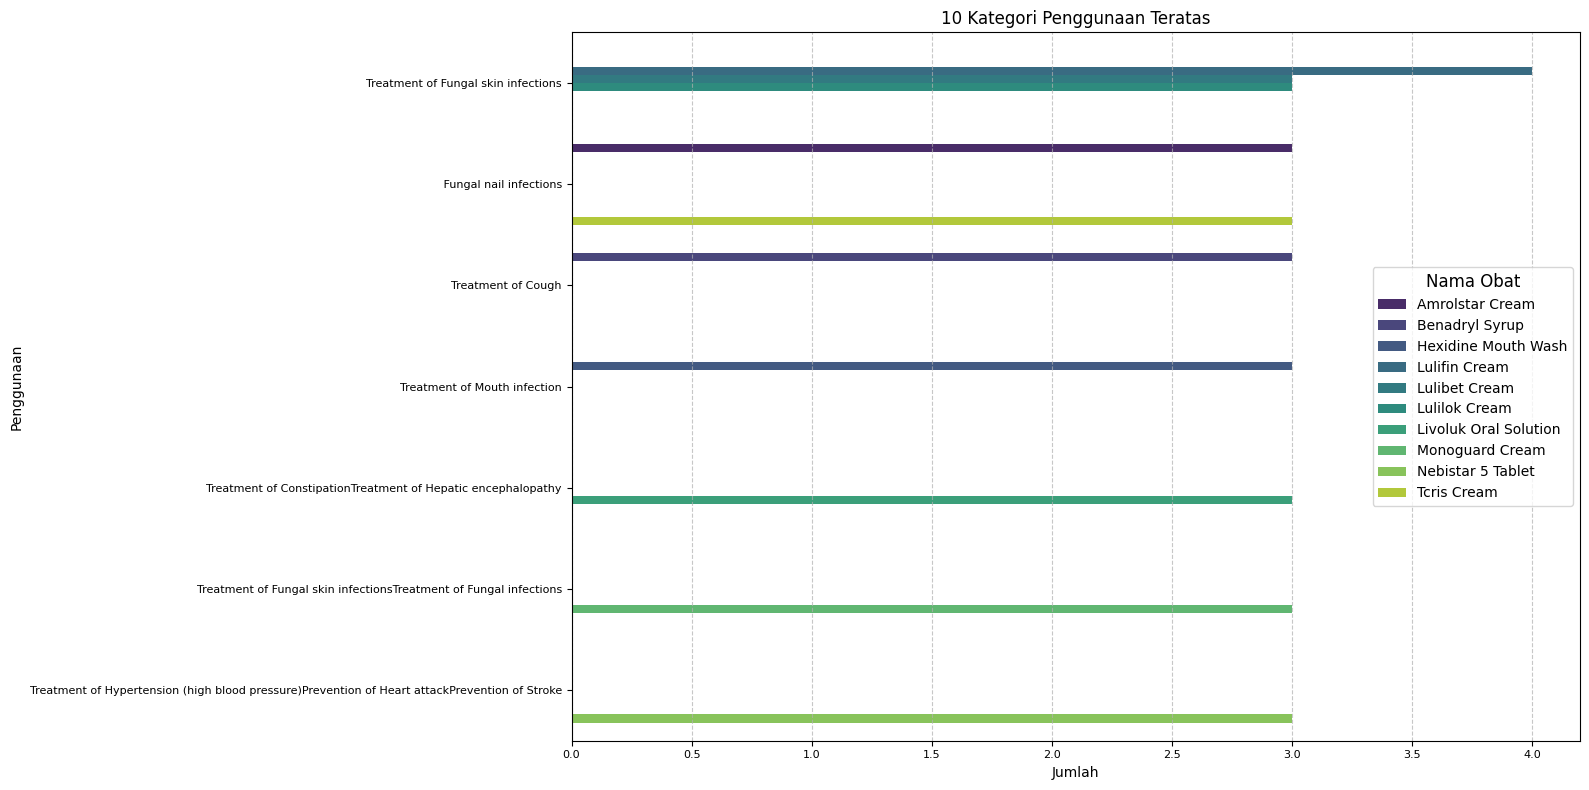

In [9]:
# Mendapatkan daftar 10 obat paling umum
top_medicines = Medicine_Recomendation['Medicine Name'].value_counts().head(10).index

# Menyaring data berdasarkan obat-obatan teratas
filtered_data = Medicine_Recomendation[Medicine_Recomendation['Medicine Name'].isin(top_medicines)]

# Membuat plot dengan hue berdasarkan nama obat
plt.figure(figsize=(16, 8))
sns.countplot(data=filtered_data, y='Uses', hue='Medicine Name', order=filtered_data['Uses'].value_counts().head(10).index, palette='viridis')
plt.title('10 Kategori Penggunaan Teratas', fontsize=12)
plt.xlabel('Jumlah', fontsize=10)  # Mengubah label sumbu x
plt.ylabel('Penggunaan', fontsize=10)  # Mengubah label sumbu y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8, rotation=0)  # Menyimpan label sumbu y tetap lurus
plt.legend(title='Nama Obat', fontsize=10, title_fontsize=12, loc='center right')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Mengganti grid menjadi sumbu x
plt.tight_layout()
plt.show()


Kode diatas bertujuan untuk membuat plot yang menunjukkan 10 kategori penggunaan obat teratas berdasarkan obat-obatan teratas, dengan setiap obat diwakili dengan warna yang berbeda.

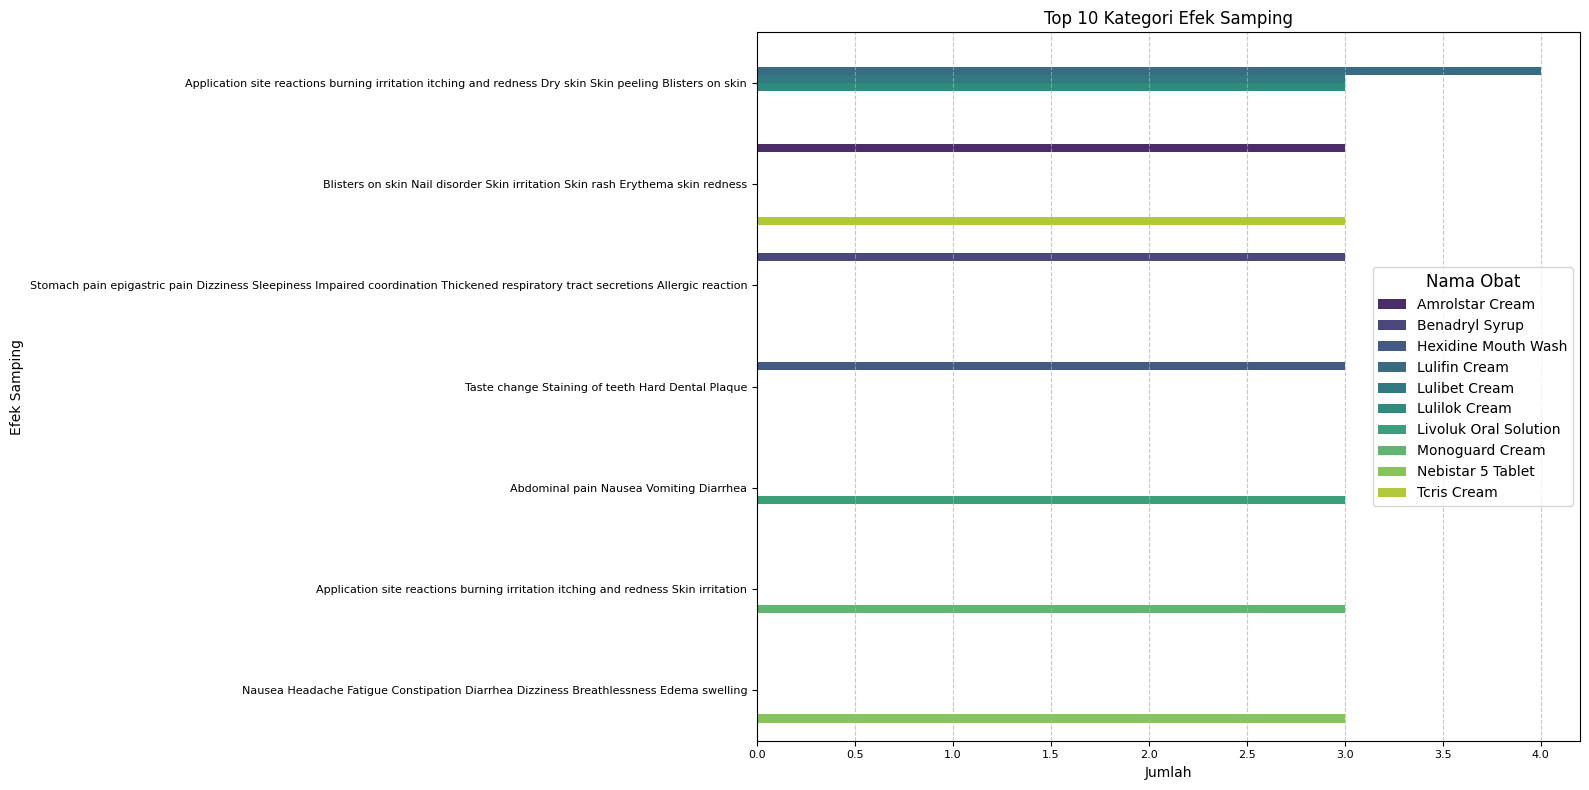

In [10]:
# Mendapatkan daftar 10 obat paling umum
top_medicines = Medicine_Recomendation['Medicine Name'].value_counts().head(10).index

# Menyaring data berdasarkan obat-obatan teratas
filtered_data = Medicine_Recomendation[Medicine_Recomendation['Medicine Name'].isin(top_medicines)]

# Membuat plot dengan hue berdasarkan nama obat
plt.figure(figsize=(16, 8))  # Menyesuaikan ukuran gambar
sns.countplot(data=filtered_data, y='Side_effects', hue='Medicine Name', order=filtered_data['Side_effects'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Kategori Efek Samping', fontsize=12)  # Menyesuaikan ukuran teks judul
plt.xlabel('Jumlah', fontsize=10)  # Menyesuaikan ukuran teks label sumbu x
plt.ylabel('Efek Samping', fontsize=10)  # Menyesuaikan ukuran teks label sumbu y
plt.xticks(fontsize=8)  # Menyesuaikan ukuran teks label sumbu x
plt.yticks(fontsize=8, rotation=0)  # Menyimpan label sumbu y tetap lurus
plt.legend(title='Nama Obat', fontsize=10, title_fontsize=12, loc='center right')  # Menyesuaikan ukuran teks legenda
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Mengganti grid menjadi sumbu x
plt.tight_layout()
plt.show()


Kode diatas bertujuan untuk membuat plot yang menunjukkan 10 kategori efek samping teratas berdasarkan obat-obatan teratas, dengan setiap obat diwakili dengan warna yang berbeda.

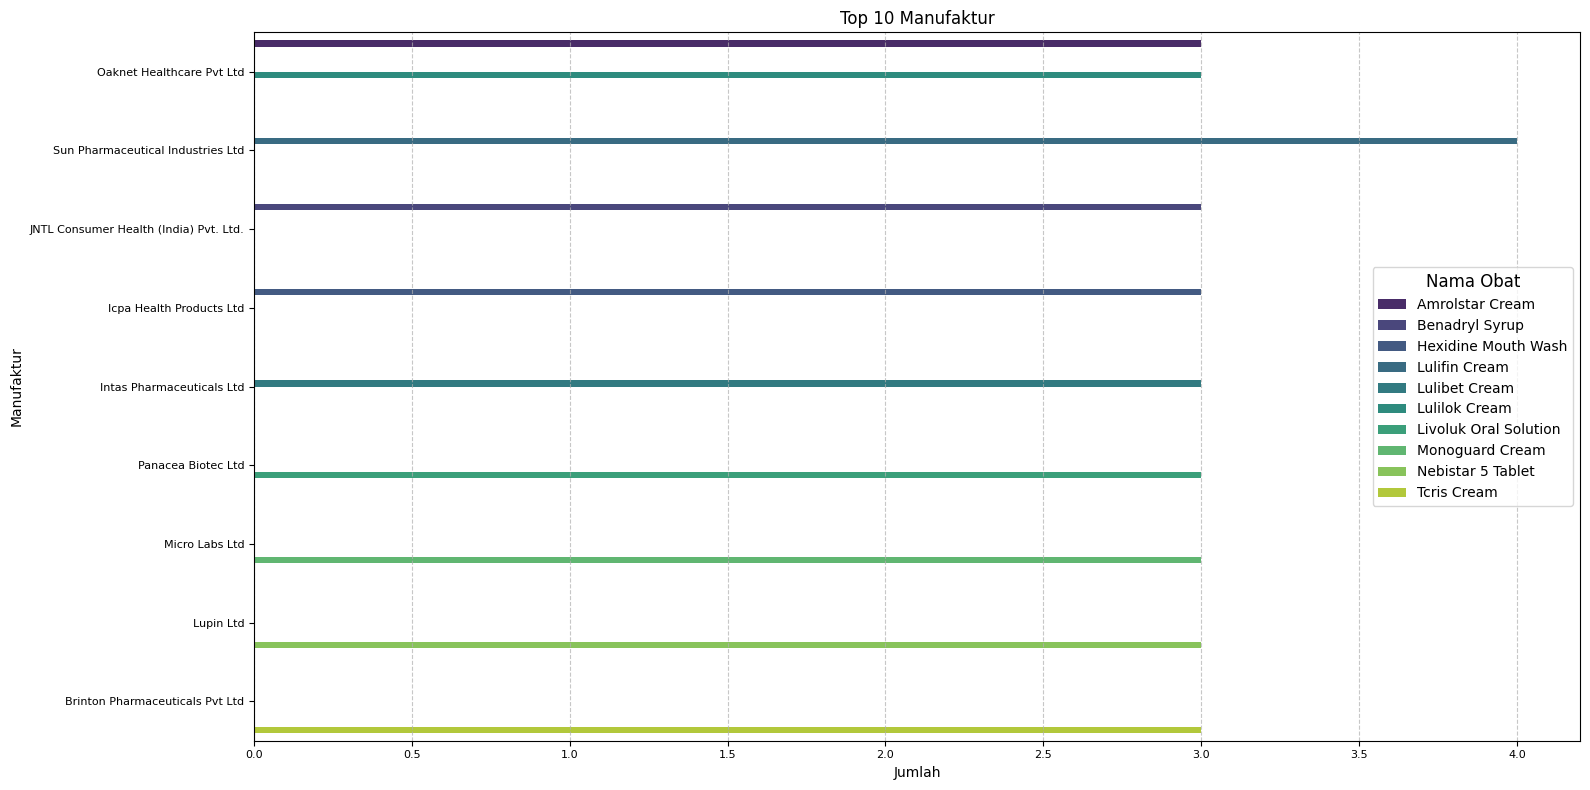

In [11]:
# Mendapatkan daftar 10 obat paling umum
top_medicines = Medicine_Recomendation['Medicine Name'].value_counts().head(10).index

# Menyaring data berdasarkan obat-obatan teratas
filtered_data = Medicine_Recomendation[Medicine_Recomendation['Medicine Name'].isin(top_medicines)]

# Membuat plot dengan hue berdasarkan nama obat
plt.figure(figsize=(16, 8))  # Menyesuaikan ukuran gambar
sns.countplot(data=filtered_data, y='Manufacturer', hue='Medicine Name', order=filtered_data['Manufacturer'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Manufaktur', fontsize=12)  # Menyesuaikan ukuran teks judul
plt.xlabel('Jumlah', fontsize=10)  # Menyesuaikan ukuran teks label sumbu x
plt.ylabel('Manufaktur', fontsize=10)  # Menyesuaikan ukuran teks label sumbu y
plt.xticks(fontsize=8)  # Menyesuaikan ukuran teks label sumbu x
plt.yticks(rotation=0, ha='right', fontsize=8)  # Menyesuaikan ukuran teks label sumbu y
plt.legend(title='Nama Obat', fontsize=10, title_fontsize=12, loc='center right')  # Menyesuaikan ukuran teks legenda
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Mengganti grid menjadi sumbu x
plt.tight_layout()
plt.show()


Kode diatas bertujuan untuk membuat plot yang menunjukkan 10 manufaktur teratas dari obat-obatan teratas, dengan setiap obat diwakili dengan warna yang berbeda.

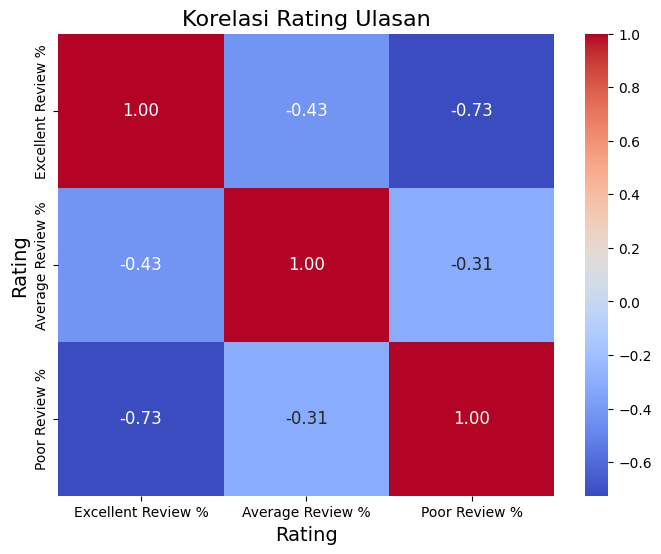

In [12]:
# Memilih kolom yang berisi rating ulasan
rating_columns = ['Excellent Review %', 'Average Review %', 'Poor Review %']

# Menghitung korelasi antar kolom rating ulasan
rating_correlation = Medicine_Recomendation[rating_columns].corr()

# Membuat heatmap dengan anotasi
plt.figure(figsize=(8, 6))
sns.heatmap(data=rating_correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Korelasi Rating Ulasan', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Visualisasi diatas menunjukkan korelasi antara kolom-kolom rating ulasan dalam dataFrame Medicine_Recomendation. Korelasi ini digunakan untuk mengetahui ukuran statistik yang mengukur sejauh mana dua variabel bergerak bersama-sama dalam hubungan linier. Dalam hasil korelasi rating ulasan yang ditampilkan dalam heatmap, nilai korelasi antara setiap pasangan kolom rating ulasan dapat dilihat sebagai angka dalam sel heatmap.

Jika ada dua kolom rating ulasan yang memiliki korelasi positif yang kuat (nilai mendekati +1), ini menunjukkan bahwa peningkatan dalam satu jenis rating ulasan (misalnya, Excellent Review %) cenderung disertai dengan peningkatan dalam jenis rating ulasan lainnya (misalnya, Average Review %).

Sebaliknya, jika ada dua kolom rating ulasan yang memiliki korelasi negatif yang kuat (nilai mendekati -1), ini menunjukkan bahwa peningkatan dalam satu jenis rating ulasan cenderung disertai dengan penurunan dalam jenis rating ulasan lainnya.

Korelasi yang mendekati 0 menunjukkan bahwa tidak ada hubungan linier yang kuat antara dua jenis rating ulasan tersebut.


## Clean Data | Membersihkan Data

In [13]:
Medicine_Recomendation.duplicated().sum()

84

Perintah diatas digunakan untuk menghitung jumlah baris yang terduplikat dalam DataFrame Medicine_Recomendation. Dalam data tersebut terdapat 84 baris yang terduplikat.

In [14]:
duplicate_rows = Medicine_Recomendation[Medicine_Recomendation.duplicated()]
print("Data Duplikat Berdasarkan Seluruh Kolom:")
print(duplicate_rows)

Data Duplikat Berdasarkan Seluruh Kolom:
                            Medicine Name  \
780           Aristogyl-F Oral Suspension   
956                  Apexitra 200 Capsule   
1121                Amyclox-LB-DS Capsule   
1140                 Arthocerin-DG Tablet   
1149       Avicaine Oral Topical Solution   
...                                   ...   
10816                 Ubiphene 100 Tablet   
11223      Vomega-HD Soft Gelatin Capsule   
11228              Vomicare Oral Solution   
11406  Xrate Cough Expectorant Sugar Free   
11824                     Zedruff Shampoo   

                                             Composition  \
780    Furazolidone (30mg/5ml) + Metronidazole (100mg...   
956                                 Itraconazole (200mg)   
1121   Amoxycillin (250mg) + Cloxacillin (250mg) + La...   
1140             Diacerein (50mg) + Glucosamine (1500mg)   
1149                                      Lidocaine (2%)   
...                                                  ...  

Perintah diatas akan menemukan dan mencetak baris-baris dalam DataFrame Medicine_Recomendation yang memiliki duplikat di semua kolom. Ini akan membantu untuk mengidentifikasi dan memeriksa baris-baris yang memiliki data yang sama persis di semua kolom.

In [15]:
clean_df = Medicine_Recomendation.drop_duplicates()

Perintah ditas akan membuat salinan DataFrame Medicine_Recomendation yang telah dibersihkan dari baris-baris yang terduplikat. Baris-baris yang terduplikat akan dihapus, dan DataFrame yang baru tanpa duplikat akan disimpan dalam variabel clean_df.

In [16]:
clean_df.duplicated().sum()

0

Setelah menghapus baris-baris yang terduplikat dari DataFrame clean_df, kemudian dapat diperiksa apakah masih ada baris yang terduplikat dengan menjalankan perintah code diatas. Jika hasilnya adalah 0, berarti tidak ada baris yang terduplikat dalam DataFrame clean_df.

# Model Training | Pelatihan Model

## Definisi Fungsi Metode

Pada bab ini, fungsi model didefinisikan terlebih dahulu karena label yang akan diklasifikasi memiliki label target yang berbeda dan juga dapat memudahkan dalam hal eksekusi model di baris code selanjutnya.

Metode yang digukan pada pelatihan model ini menerapkan 4 model antara lain Decision Tree, Random Forest, K-Nearest Neighbors dan Naive Bayes. Model ini cocok digunakan pada metode Klasifikasi untuk memprediksi klasifikasi pada data uji.

In [17]:
# Fungsi untuk model Decision Tree
def train_decision_tree(X_train, y_train):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    return dt_classifier

# Fungsi untuk model Random Forest
def train_random_forest(X_train, y_train):
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

# Fungsi untuk melatih model KNN
def train_knn(X_train, y_train):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    return knn_model

# Fungsi untuk melatih model Naive Bayes
def train_naive_bayes(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    return nb_model

## Decision Tree

##### Pada model decision tree dibawah ini digunakan untuk memprediksi kualitas ulasan baru berdasarkan fitur-fitur yang diberikan, seperti Excellent, Average dan Poor Review. Selain itu decision tree diatas digunakan untuk mengidentifikasi hubungan antara fitur-fitur tersebut dengan kualitas ulasan yang mana telah dievaluasi menggunakan metrik evaluasi, seperti Accuracy, Precision, Recall dan F1 untuk memahami seberapa baik model bekerja dalam mengklasifikasikan ulasan-ulasan tersebut.

#### 1. Excellent Review %

In [18]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Excellent Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Excellent Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model Decision Tree Classifier
dt_classifier_encoded_Excellent = train_decision_tree(X_train_encoded, y_train_encoded)

# dt_classifier_encoded_Excellent.fit(X_train_encoded, y_train_encoded)

In [19]:
# Fungsi untuk mengevaluasi model Decision Tree untuk klasifikasi multikelas
def evaluate_decision_tree_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)  # Menggunakan average='weighted' untuk klasifikasi multikelas
    return accuracy, precision, recall, f1

# Evaluasi model Decision Tree
accuracy, precision, recall, f1 = evaluate_decision_tree_model(dt_classifier_encoded_Excellent, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.10089399744572158
Precision: 0.08092168471031776
Recall: 0.10089399744572158
F1-score: 0.06826063116955616


#### 2. Average Review %

In [20]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Average Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Average Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model Decision Tree Classifier
dt_classifier_encoded_Average = train_decision_tree(X_train_encoded, y_train_encoded)

# dt_classifier_encoded_Average.fit(X_train_encoded, y_train_encoded)

In [21]:
# Fungsi untuk mengevaluasi model Decision Tree untuk klasifikasi multikelas
def evaluate_decision_tree_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)  # Menggunakan average='weighted' untuk klasifikasi multikelas
    return accuracy, precision, recall, f1

# Evaluasi model Decision Tree
accuracy, precision, recall, f1 = evaluate_decision_tree_model(dt_classifier_encoded_Average, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.09450830140485313
Precision: 0.06830637762213469
Recall: 0.09450830140485313
F1-score: 0.06363755158121222


#### 3. Poor Review %

In [22]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Poor Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Poor Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model Decision Tree Classifier
dt_classifier_encoded_Poor = train_decision_tree(X_train_encoded, y_train_encoded)

# dt_classifier_encoded_Poor.fit(X_train_encoded, y_train_encoded)

In [23]:
# Fungsi untuk mengevaluasi model Decision Tree untuk klasifikasi multikelas
def evaluate_decision_tree_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)  # Menggunakan average='weighted' untuk klasifikasi multikelas
    return accuracy, precision, recall, f1

# Evaluasi model Decision Tree
accuracy, precision, recall, f1 = evaluate_decision_tree_model(dt_classifier_encoded_Poor, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.20136228182205193
Precision: 0.12813203629935313
Recall: 0.20136228182205193
F1-score: 0.13829970164622465


## Random Forest

##### Pada model Random Forest dibawah ini digunakan untuk meningkatkan kinerja model klasifikasi ulasan dengan memanfaatkan kekuatan gabungan dari banyak decision tree. Selain itu Random Forest juga digunakan untuk mengevaluasi pentingnya fitur-fitur dalam data yang mana dapat membantu memahami fitur-fitur mana yang berpengaruh dalam menentukan kualitas ulasan.

#### 1. Excellent Review %

In [ ]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Excellent Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Excellent Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model Random Forest Classifier
rf_classifier_encoded_Excellent = train_random_forest(X_train_encoded, y_train_encoded)

# rf_classifier_encoded_Excellent.fit(X_train_encoded, y_train_encoded)

In [25]:
# Fungsi untuk mengevaluasi model Random Forest
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1, support

# Evaluasi model Random Forest
accuracy, precision, recall, f1, support = evaluate_random_forest(rf_classifier_encoded_Excellent, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.10727969348659004
Precision: 0.08267515276793173
Recall: 0.10727969348659004
F1-score: 0.06559585784113398


#### 2. Average Review %

In [ ]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Average Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Average Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model Random Forest Classifier
rf_classifier_encoded_Average = train_random_forest(X_train_encoded, y_train_encoded)

# rf_classifier_encoded_Average.fit(X_train_encoded, y_train_encoded)

In [27]:
# Fungsi untuk mengevaluasi model Random Forest
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model Random Forest
accuracy, precision, recall, f1 = evaluate_random_forest(rf_classifier_encoded_Average, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.11451681566624096
Precision: 0.07845917655844789
Recall: 0.11451681566624096
F1-score: 0.06164535704020953


#### 3. Poor Review %

In [28]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Poor Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Poor Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model Random Forest Classifier
rf_classifier_encoded_Poor = train_random_forest(X_train_encoded, y_train_encoded)

# rf_classifier_encoded_Poor.fit(X_train_encoded, y_train_encoded)

In [29]:
# Fungsi untuk mengevaluasi model Random Forest
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model Random Forest
accuracy, precision, recall, f1= evaluate_random_forest(rf_classifier_encoded_Poor, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.2473392933163048
Precision: 0.15279114254066664
Recall: 0.2473392933163048
F1-score: 0.1367261540888134


## K-Nearest Neighbors (KNN)

##### Metode ini sederhana dan relatif mudah diimplementasikan. Algoritma ini juga fleksibel dalam menyesuaikan pola dalam data tanpa memerlukan asumsi bentuk distribusi data. Selain itu model ini juga digunakan untuk memodelkan hubungan kompleks antara fitur-fitur yang ada dalam ulasan dengan kualitas ulasan yang ingin diprediksi. Model ini melakukan klasifikasi berdasarkan mayoritas kelas dari tetangga terdekat dari suatu titik data yang akan diprediksi dan bergantung pada struktur lokal dari data.

#### 1. Excellent Review %

In [30]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Excellent Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Excellent Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model KNN
knn_model_encoded_Excellent = train_knn(X_train_encoded, y_train_encoded)

knn_model_encoded_Excellent.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier()

In [31]:
# Fungsi untuk mengevaluasi model KNN
def evaluate_knn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model KNN
accuracy, precision, recall, f1 = evaluate_knn(knn_model_encoded_Excellent, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.08301404853128991
Precision: 0.12159854378694451
Recall: 0.08301404853128991
F1-score: 0.05908604799647063


#### 2. Average Review %

In [32]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Average Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Average Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model KNN
knn_model_encoded_Average = train_knn(X_train_encoded, y_train_encoded)

knn_model_encoded_Average.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier()

In [33]:
# Fungsi untuk mengevaluasi model KNN
def evaluate_knn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model KNN
accuracy, precision, recall, f1= evaluate_knn(knn_model_encoded_Average, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.07960834397616007
Precision: 0.09702757538258912
Recall: 0.07960834397616007
F1-score: 0.05691591503674729


#### 3. Poor Review %

In [34]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Poor Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Poor Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model KNN
knn_model_encoded_Poor = train_knn(X_train_encoded, y_train_encoded)

knn_model_encoded_Poor.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier()

In [35]:
# Fungsi untuk mengevaluasi model KNN
def evaluate_knn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model KNN
accuracy, precision, recall, f1 = evaluate_knn(knn_model_encoded_Poor, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.2064708386547467
Precision: 0.16423834181307817
Recall: 0.2064708386547467
F1-score: 0.13287944059937754


## Naive Bayes

##### Model ini sangat cocok pada klasifikasi ini karena datanya besar dan jumlah fitur yang cukup banyak yang mana cenderung sangat efisien secara komputasional dan menjadi pilihan terbaik untuk dataset dengan skala besar atau ingin menjalankan eksperimen dengan cepat. Model ini melakukan klasifikasi berdasarkan probabilitas dari setiap kelas dengan memperkirakan probabilitas dari setiap kelas berdasarkan fitur-fitur yang ada dalam data. Hal ini akan membantu meyakinkan model dalam membuat prediksi.

#### 1. Excellent Review %

In [36]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Excellent Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Excellent Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model nb
nb_model_encoded_Excellent = train_naive_bayes(X_train_encoded, y_train_encoded)

nb_model_encoded_Excellent.fit(X_train_encoded, y_train_encoded)

GaussianNB()

In [37]:
# Fungsi untuk mengevaluasi model nb
def evaluate_nb(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model nb
accuracy, precision, recall, f1 = evaluate_nb(nb_model_encoded_Excellent, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.033631332481907195
Precision: 0.07148973607902483
Recall: 0.033631332481907195
F1-score: 0.04279385628606889


#### 2. Average Review %

In [38]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Average Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Average Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model nb
nb_model_encoded_Average = train_naive_bayes(X_train_encoded, y_train_encoded)

nb_model_encoded_Average.fit(X_train_encoded, y_train_encoded)

GaussianNB()

In [39]:
# Fungsi untuk mengevaluasi model nb
def evaluate_nb(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model nb
accuracy, precision, recall, f1 = evaluate_nb(nb_model_encoded_Excellent, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.021285653469561516
Precision: 0.052713177809481114
Recall: 0.021285653469561516
F1-score: 0.02766134843066842


#### 3. Poor Review %

In [40]:
# Memilih fitur dan target
x = clean_df[['Medicine Name', 'Composition', 'Uses', 'Manufacturer']]
y = clean_df['Poor Review %']

# One-hot encoding untuk fitur kategorikal
x_encoded = pd.get_dummies(x, columns=['Medicine Name', 'Composition', 'Uses', 'Manufacturer'])

# Memilih fitur dan target yang sudah dienkoding
X_encoded = x_encoded
y_encoded = clean_df['Poor Review %']

# Memisahkan data menjadi data latih dan data uji
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Melatih model nb
nb_model_encoded_Poor = train_naive_bayes(X_train_encoded, y_train_encoded)

nb_model_encoded_Poor.fit(X_train_encoded, y_train_encoded)

GaussianNB()

In [41]:
# Fungsi untuk mengevaluasi model nb
def evaluate_nb(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Evaluasi model nb
accuracy, precision, recall, f1= evaluate_nb(nb_model_encoded_Excellent, X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.023414218816517667
Precision: 0.10676797715835085
Recall: 0.023414218816517667
F1-score: 0.032974433166765175


# Model Evaluation | Evaluasi Model

##### Evaluasi Model merupakan langkah penting dalam membangun sistem machine learning data science. Hal tersebut membantu memahami seberapa baik model yang telah dilatih sebelumnya dalam melakukan tugas-tugas tertentu, dalam hal ini pengklasifikasian. Evaluasi model ini membantu guna mengukur kinerja model dalam melakukan tugas, membandingkan beberapa model untuk memilih yang terbaik dan menemukan kekurangan dalam model yang telah dilatih
##### Dari model yang telah dievaluasi sebelumnya, dapat dilihat metrik evaluasi yang mana Random Forest mengungguli dalam pengklasifikasian model lainnya seperti Accuracy, Precision, Recall dan F-1 pada 2 label yaitu Excellent dan Poor, untuk Average diungguli oleh model K-Nearest Neighbors.

#### 1. Evaluasi Model Excellent Review %

In [ ]:
models = ['Decision Tree (Excellent)', 'Random Forest (Excellent)',
          'K-Nearest Neighbors (Excellent)', 'Naive Bayes (Excellent)']

model_colors = sns.color_palette("Dark2")
accuracy = []
recall = []
precision = []
f1 = []
predictions = [dt_classifier_encoded_Excellent, rf_classifier_encoded_Excellent,
               knn_model_encoded_Excellent, nb_model_encoded_Excellent]

# Loop melalui setiap prediksi model dalam daftar predictions
for model_pred in predictions:
    # Memprediksi nilai target untuk data uji menggunakan model_pred
    y_pred = model_pred.predict(X_test_encoded)

    # Hitung metrik evaluasi untuk model_pred dan simpan ke dalam list
    accuracy.append(accuracy_score(y_test_encoded, y_pred))
    precision.append(precision_score(y_test_encoded, y_pred, average='weighted'))
    recall.append(recall_score(y_test_encoded, y_pred, average='weighted'))
    f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))

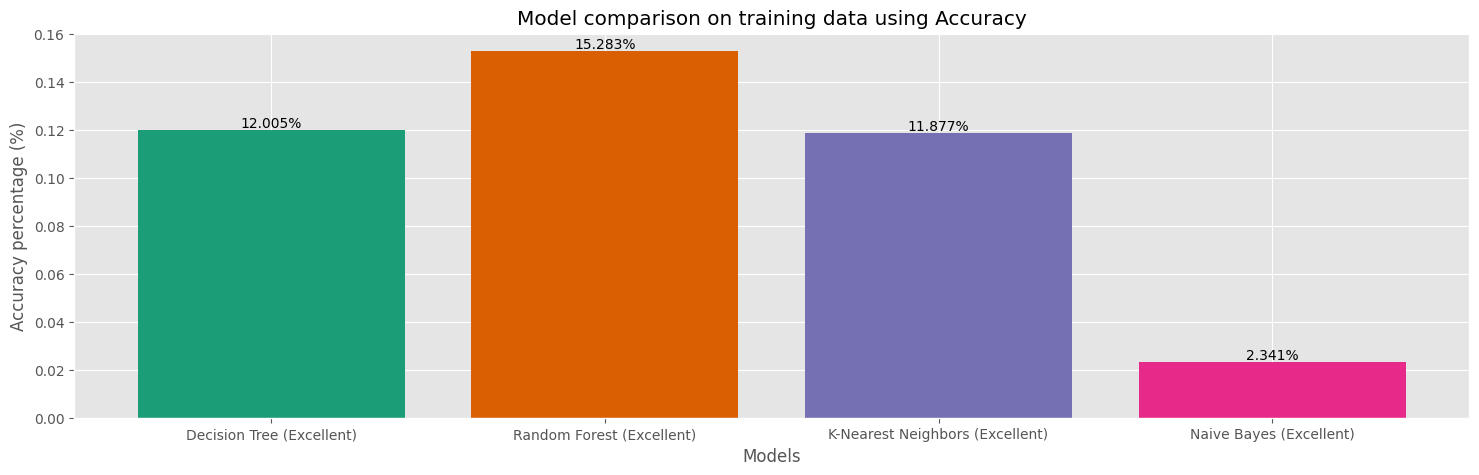

In [43]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, accuracy, color=model_colors)
    for m, a in zip(models, accuracy):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Accuracy percentage (%)')
    plt.title('Model comparison on training data using Accuracy')
    plt.show()

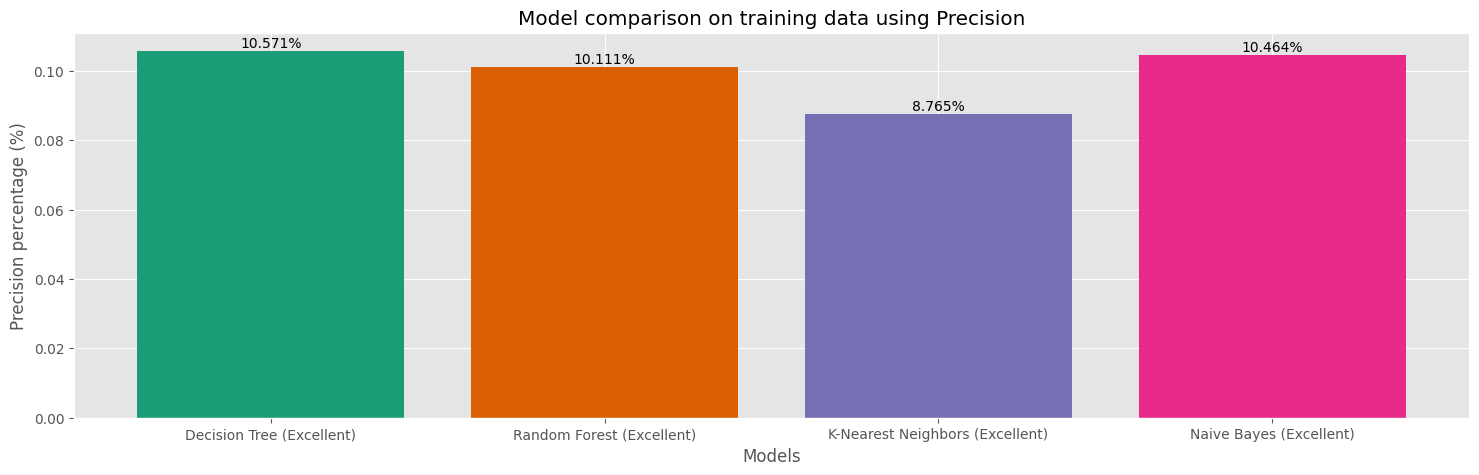

In [44]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, precision, color=model_colors)
    for m, a in zip(models, precision):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Precision percentage (%)')
    plt.title('Model comparison on training data using Precision')
    plt.show()

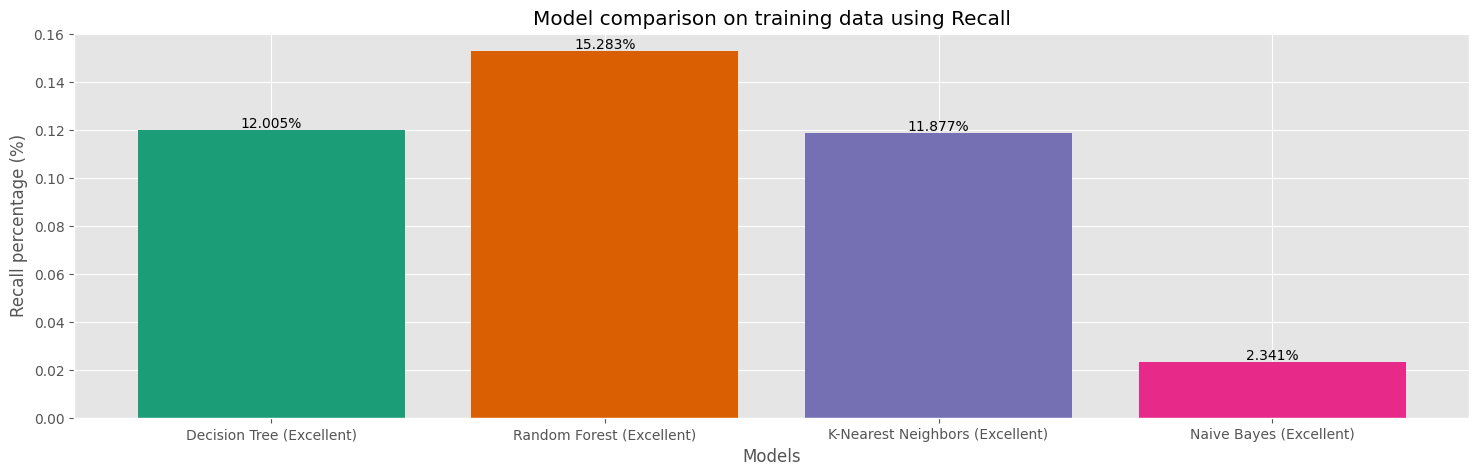

In [45]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, recall, color=model_colors)
    for m, a in zip(models, recall):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Recall percentage (%)')
    plt.title('Model comparison on training data using Recall')
    plt.show()

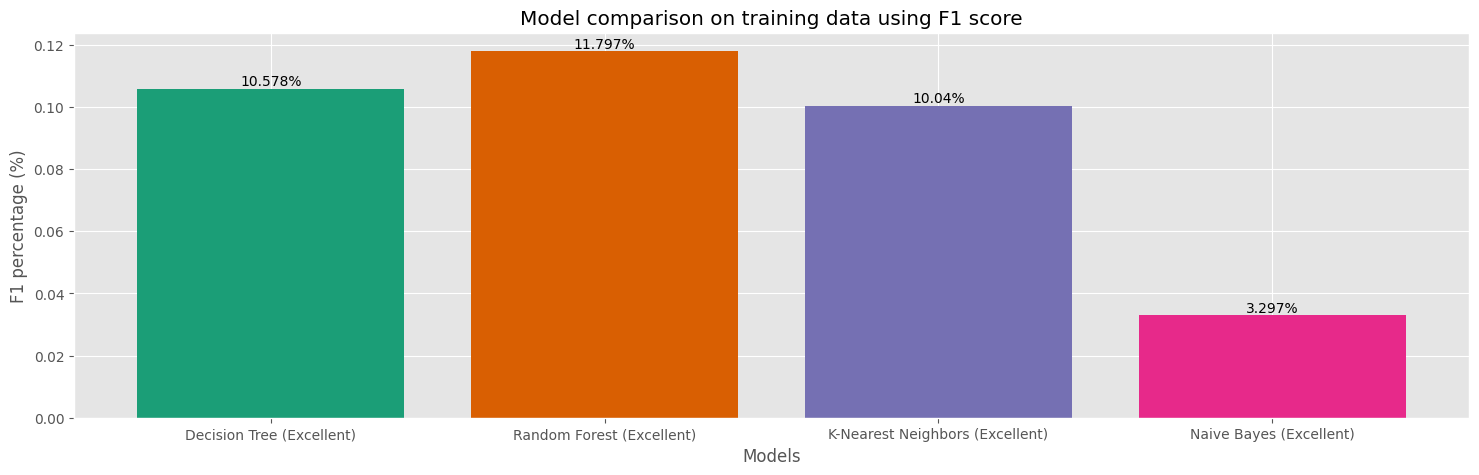

In [46]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, f1, color=model_colors)
    for m, a in zip(models, f1):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('F1 percentage (%)')
    plt.title('Model comparison on training data using F1 score')
    plt.show()

#### 2. Evaluasi Model Average Review %

In [ ]:
models = ['Decision Tree (Average)', 'Random Forest (Average)',
          'K-Nearest Neighbors (Average)', 'Naive Bayes (Average)']

model_colors = sns.color_palette("Dark2")
accuracy = []
recall = []
precision = []
f1 = []
predictions = [dt_classifier_encoded_Average, rf_classifier_encoded_Average,
               knn_model_encoded_Average, nb_model_encoded_Average]

# Loop melalui setiap prediksi model dalam daftar predictions
for model_pred in predictions:
    # Memprediksi nilai target untuk data uji menggunakan model_pred
    y_pred = model_pred.predict(X_test_encoded)

    # Hitung metrik evaluasi untuk model_pred dan simpan ke dalam list
    accuracy.append(accuracy_score(y_test_encoded, y_pred))
    precision.append(precision_score(y_test_encoded, y_pred, average='weighted'))
    recall.append(recall_score(y_test_encoded, y_pred, average='weighted'))
    f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))

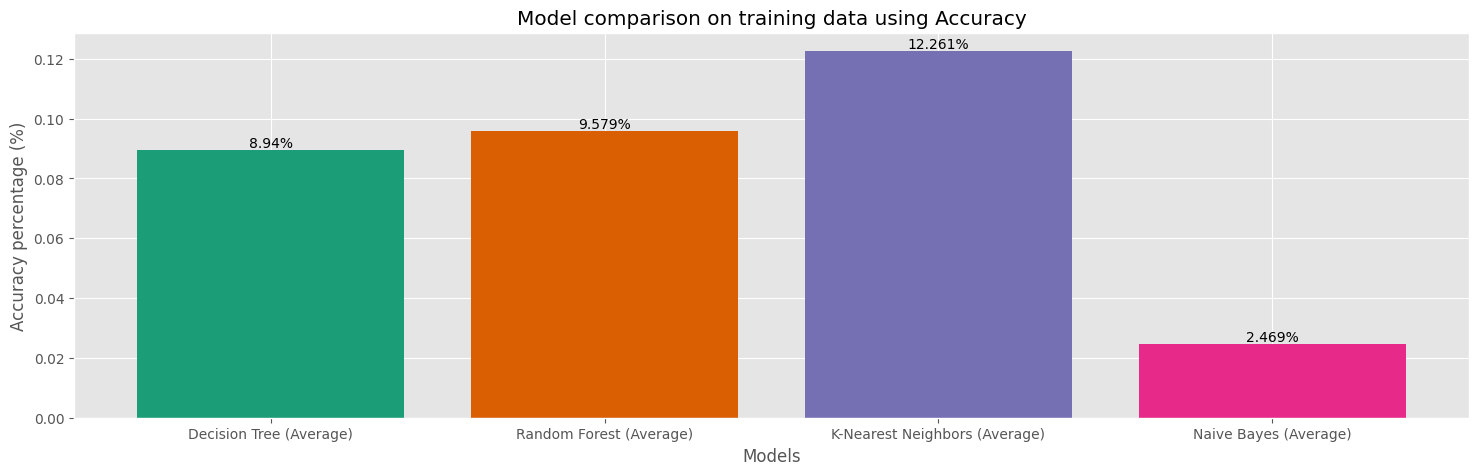

In [48]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, accuracy, color=model_colors)
    for m, a in zip(models, accuracy):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Accuracy percentage (%)')
    plt.title('Model comparison on training data using Accuracy')
    plt.show()

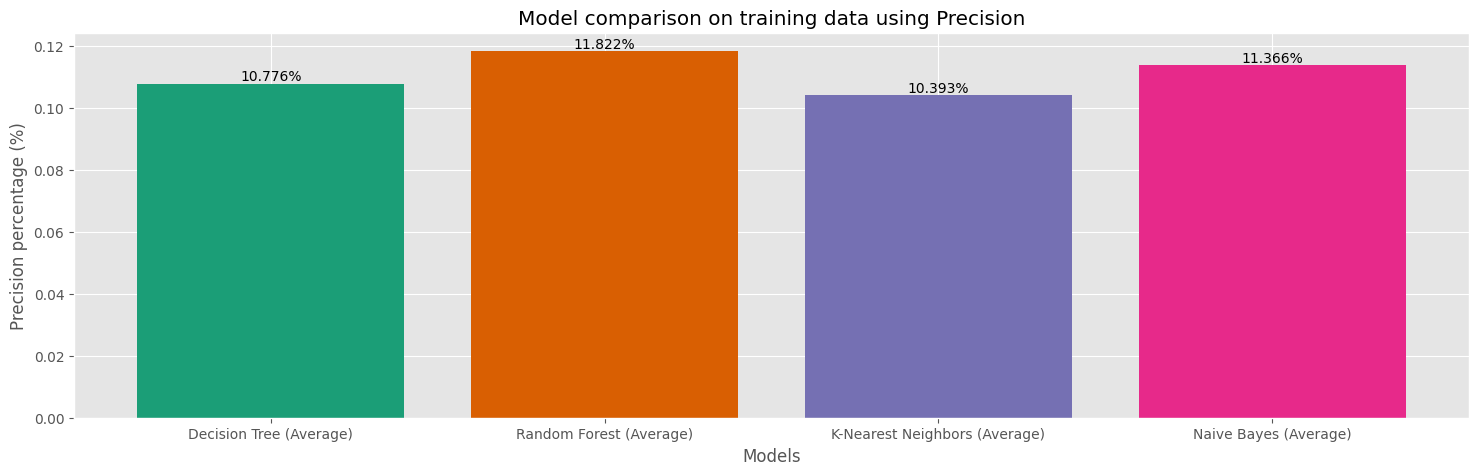

In [49]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, precision, color=model_colors)
    for m, a in zip(models, precision):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Precision percentage (%)')
    plt.title('Model comparison on training data using Precision')
    plt.show()

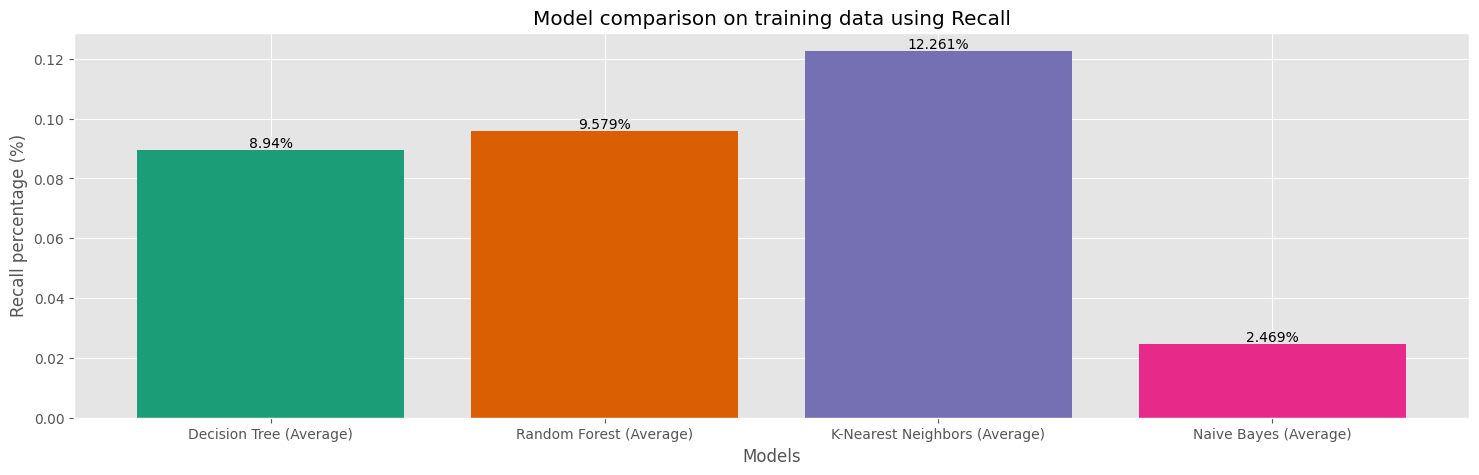

In [50]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, recall, color=model_colors)
    for m, a in zip(models, recall):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Recall percentage (%)')
    plt.title('Model comparison on training data using Recall')
    plt.show()

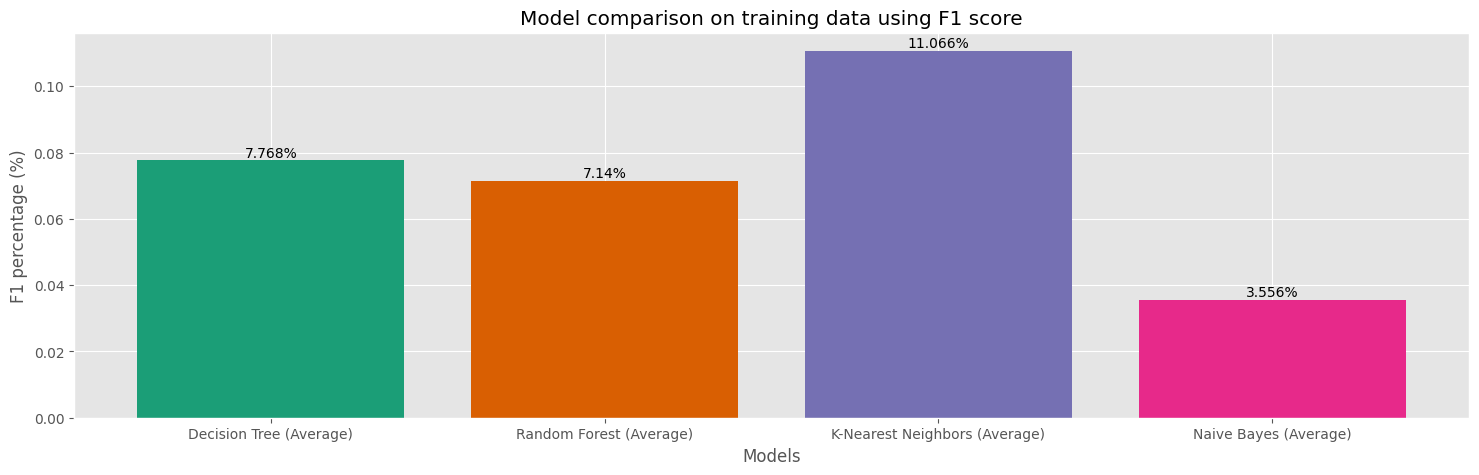

In [51]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, f1, color=model_colors)
    for m, a in zip(models, f1):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('F1 percentage (%)')
    plt.title('Model comparison on training data using F1 score')
    plt.show()

#### 3. Evaluasi Model Poor Review %

In [ ]:
models = ['Decision Tree (Poor)', 'Random Forest (Poor)',
          'K-Nearest Neighbors (Poor)', 'Naive Bayes (Poor)']

model_colors = sns.color_palette("Dark2")
accuracy = []
recall = []
precision = []
f1 = []
predictions = [dt_classifier_encoded_Poor, rf_classifier_encoded_Poor,
               knn_model_encoded_Poor, nb_model_encoded_Poor]

# Loop melalui setiap prediksi model dalam daftar predictions
for model_pred in predictions:
    # Memprediksi nilai target untuk data uji menggunakan model_pred
    y_pred = model_pred.predict(X_test_encoded)

    # Hitung metrik evaluasi untuk model_pred dan simpan ke dalam list
    accuracy.append(accuracy_score(y_test_encoded, y_pred))
    precision.append(precision_score(y_test_encoded, y_pred, average='weighted'))
    recall.append(recall_score(y_test_encoded, y_pred, average='weighted'))
    f1.append(f1_score(y_test_encoded, y_pred, average='weighted'))

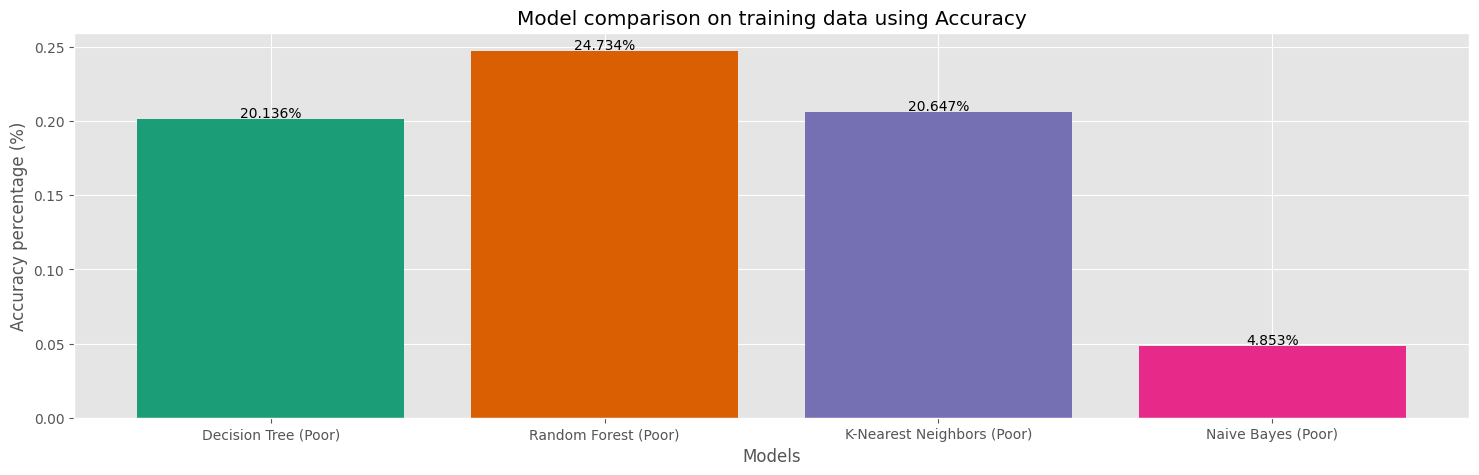

In [53]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, accuracy, color=model_colors)
    for m, a in zip(models, accuracy):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Accuracy percentage (%)')
    plt.title('Model comparison on training data using Accuracy')
    plt.show()

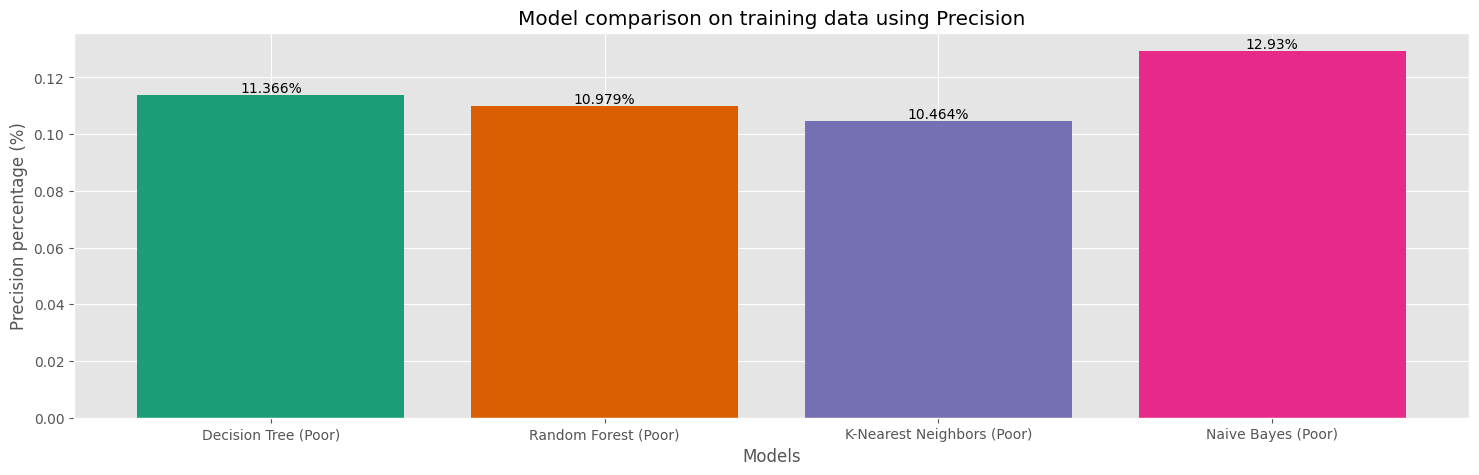

In [54]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, precision, color=model_colors)
    for m, a in zip(models, precision):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Precision percentage (%)')
    plt.title('Model comparison on training data using Precision')
    plt.show()

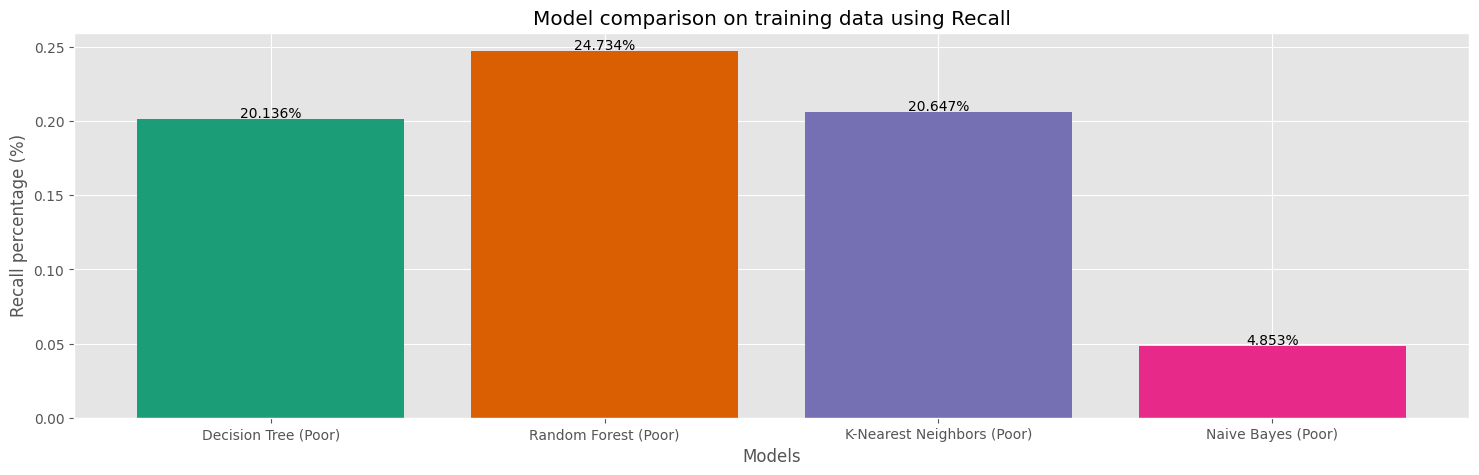

In [55]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, recall, color=model_colors)
    for m, a in zip(models, recall):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Recall percentage (%)')
    plt.title('Model comparison on training data using Recall')
    plt.show()

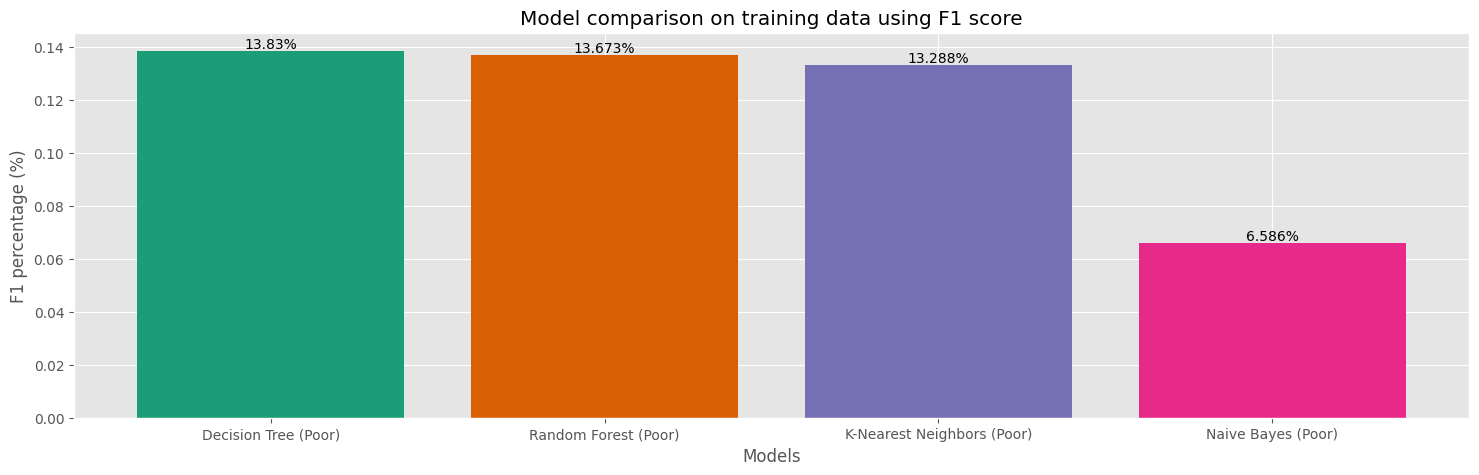

In [56]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18, 5))
    plt.bar(models, f1, color=model_colors)
    for m, a in zip(models, f1):
        plt.text(m, a+0.001 , f'{round(a*100, 3)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('F1 percentage (%)')
    plt.title('Model comparison on training data using F1 score')
    plt.show()

# Model Selection | Pemilihan Model

##### Proses ini melibatkan perbandingan berbagai jenis model untuk menemukan model mana yang paling sesuai dengan masalah yang sedang diselesaikan. Melihat hasil perbandingan dari model yang terbaik dari label ulasan yang telah ditemukan, terdapat kesimpulan yang diperoleh antara lain:
1. Untuk metrik model terbaik Excellent yaitu Random Forest.
2. Untuk Metrik model terbaik Average yaitu K-Nearest Neighbors.
3. Untuk metrik model terbaik Poor yaitu Random Forest.

##### Maka pemilihan model terbaik yaitu Random Forest yang menggungguli perbandingan dari jenis model-model yang telah dilatih.

In [57]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

In [58]:
# List model dan nama-nama model
models = [dt_classifier_encoded_Excellent, rf_classifier_encoded_Excellent,
          knn_model_encoded_Excellent, nb_model_encoded_Excellent]
model_names = ['Decision Tree (Excellent)', 'Random Forest (Excellent)',
               'K-Nearest Neighbors (Excellent)', 'Naive Bayes (Excellent)']

# Inisialisasi variabel untuk menyimpan hasil evaluasi
best_model_name = None
best_metrics = {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-score': 0}

# Loop melalui setiap model dan evaluasi
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_encoded, y_test_encoded)

    # Membandingkan metrik evaluasi dengan model terbaik yang sudah ada
    if accuracy > best_metrics['Accuracy']:
        best_metrics['Accuracy'] = accuracy
        best_model_name = name

    if precision > best_metrics['Precision']:
        best_metrics['Precision'] = precision

    if recall > best_metrics['Recall']:
        best_metrics['Recall'] = recall

    if f1 > best_metrics['F1-score']:
        best_metrics['F1-score'] = f1

# Menampilkan model terbaik dan metrik evaluasi terbaiknya
print("Best Model untuk Metrics Excellent:", best_model_name)
print("Best Metrics Excellent:", best_metrics)


Best Model untuk Metrics Excellent: Random Forest (Excellent)
Best Metrics Excellent: {'Accuracy': 0.1528309919114517, 'Precision': 0.14658182899926817, 'Recall': 0.1528309919114517, 'F1-score': 0.11797468721623139}


In [59]:
# List model dan nama-nama model
models = [dt_classifier_encoded_Average, rf_classifier_encoded_Average,
          knn_model_encoded_Average, nb_model_encoded_Average]
model_names = ['Decision Tree (Average)', 'Random Forest (Average)',
               'K-Nearest Neighbors (Average)', 'Naive Bayes (Average)']

# Inisialisasi variabel untuk menyimpan hasil evaluasi
best_model_name = None
best_metrics = {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-score': 0}

# Loop melalui setiap model dan evaluasi
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_encoded, y_test_encoded)

    # Membandingkan metrik evaluasi dengan model terbaik yang sudah ada
    if accuracy > best_metrics['Accuracy']:
        best_metrics['Accuracy'] = accuracy
        best_model_name = name

    if precision > best_metrics['Precision']:
        best_metrics['Precision'] = precision

    if recall > best_metrics['Recall']:
        best_metrics['Recall'] = recall

    if f1 > best_metrics['F1-score']:
        best_metrics['F1-score'] = f1

# Menampilkan model terbaik dan metrik evaluasi terbaiknya
print("Best Model untuk Metrics Average:", best_model_name)
print("Best Metrics Average:", best_metrics)


Best Model untuk Metrics Average: K-Nearest Neighbors (Average)
Best Metrics Average: {'Accuracy': 0.12260536398467432, 'Precision': 0.2093258235825266, 'Recall': 0.12260536398467432, 'F1-score': 0.11066009549694983}


In [60]:
# List model dan nama-nama model
models = [dt_classifier_encoded_Poor, rf_classifier_encoded_Poor,
          knn_model_encoded_Poor, nb_model_encoded_Poor]
model_names = ['Decision Tree (Poor)', 'Random Forest (Poor)',
               'K-Nearest Neighbors (Poor)', 'Naive Bayes (Poor)']

# Inisialisasi variabel untuk menyimpan hasil evaluasi
best_model_name = None
best_metrics = {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-score': 0}

# Loop melalui setiap model dan evaluasi
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_encoded, y_test_encoded)

    # Membandingkan metrik evaluasi dengan model terbaik yang sudah ada
    if accuracy > best_metrics['Accuracy']:
        best_metrics['Accuracy'] = accuracy
        best_model_name = name

    if precision > best_metrics['Precision']:
        best_metrics['Precision'] = precision

    if recall > best_metrics['Recall']:
        best_metrics['Recall'] = recall

    if f1 > best_metrics['F1-score']:
        best_metrics['F1-score'] = f1

# Menampilkan model terbaik dan metrik evaluasi terbaiknya
print("Best Model untuk Metrics Average:", best_model_name)
print("Best Metrics Average:", best_metrics)


Best Model untuk Metrics Average: Random Forest (Poor)
Best Metrics Average: {'Accuracy': 0.2473392933163048, 'Precision': 0.16423834181307817, 'Recall': 0.2473392933163048, 'F1-score': 0.13829970164622465}


# Conclusion | Kesimpulan

Tahap-tahap dalam membangun machine learning data science sangat perlu diperhatikan dari tahap menganalisis data, mempersiapkan data, Mengekplorasi data, membersihkan data, Memilih Model, melakukan evaluasi hingga pemilihan model itu sangat penting. Model juga akan mempengaruhi bagaimana data nantinya akan digunakan.

Dalam merancang atau membangun machine learning data science pada dataset Medicine_Recomendation telah diperoleh model yang cocok digunakan untuk memprediksi data dengan model Random Forest. Model ini menggungguli 3 model klasifikasi pada dataset ini. Dengan memperhatikan metrik evaluasi dan perbandingan-perbandingan kinerja maka dapat disimpulkan model Random Forest cocok untuk metode klasifikasi pada dataset ini.